# Проект для оператора связи «ТелеДом»

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).


Также доступны такие услуги:

- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).


Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

**Цель:**  Обучить на данных, предоставленных заказчиком, модель для прогноза оттока клиентов.

**Задача:** Обучить минимум 2 разных алгоритма, выбрать лучший и протестировать. На тестовой выборке метрика AUC-ROC должна быть >= 85.

**Описание данных**

Данные состоят из нескольких файлов, полученных из разных источников:

- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Информация о договорах актуальна на 1 февраля 2020 года.

**Критерии, которые важны заказчику:**

1. Основная метрика - AUC-ROC.
2. Пороговое значение основной метрики - >= 0.85.
3. Дополнительно считаем и интерпретируем метрику Accuracy.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Загрузка-библиотек" data-toc-modified-id="1.-Загрузка-библиотек-1">1. Загрузка библиотек</a></span></li><li><span><a href="#2.-Загрузка-данных" data-toc-modified-id="2.-Загрузка-данных-2">2. Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1">Вывод</a></span></li></ul></li><li><span><a href="#3.-Предобработка-и-анализ-данных" data-toc-modified-id="3.-Предобработка-и-анализ-данных-3">3. Предобработка и анализ данных</a></span><ul class="toc-item"><li><span><a href="#3.-1.-Предобработка-и-анализ-contract-(информация-о-договоре):" data-toc-modified-id="3.-1.-Предобработка-и-анализ-contract-(информация-о-договоре):-3.1">3. 1. Предобработка и анализ contract (информация о договоре):</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.1">Вывод</a></span></li></ul></li><li><span><a href="#3.-2.-Предобработка-и-анализ-personal-(персональные-данные-клиента):" data-toc-modified-id="3.-2.-Предобработка-и-анализ-personal-(персональные-данные-клиента):-3.2">3. 2. Предобработка и анализ personal (персональные данные клиента):</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.1">Вывод</a></span></li></ul></li><li><span><a href="#3.-3.-Предобработка-и-анализ-internet-(информация-об-интернет-услугах):" data-toc-modified-id="3.-3.-Предобработка-и-анализ-internet-(информация-об-интернет-услугах):-3.3">3. 3. Предобработка и анализ internet (информация об интернет-услугах):</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3.1">Вывод</a></span></li></ul></li><li><span><a href="#3.-4.-Предобработка-и-анализ-phone-(-информация-об-услугах-телефонии):" data-toc-modified-id="3.-4.-Предобработка-и-анализ-phone-(-информация-об-услугах-телефонии):-3.4">3. 4. Предобработка и анализ phone ( информация об услугах телефонии):</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4.1">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#4.-Объединение-данных" data-toc-modified-id="4.-Объединение-данных-4">4. Объединение данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.1">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#5.-Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма" data-toc-modified-id="5.-Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма-5">5. Исследовательский анализ и предобработка данных объединённого датафрейма</a></span><ul class="toc-item"><li><span><a href="#5.-1.-Распределение-признаков" data-toc-modified-id="5.-1.-Распределение-признаков-5.1">5. 1. Распределение признаков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1.1">Вывод</a></span></li></ul></li><li><span><a href="#5.-2.-Корреляционный-анализ" data-toc-modified-id="5.-2.-Корреляционный-анализ-5.2">5. 2. Корреляционный анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.2.1">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#6.-Подготовка-данных" data-toc-modified-id="6.-Подготовка-данных-6">6. Подготовка данных</a></span></li><li><span><a href="#7.-Обучение-моделей-машинного-обучения" data-toc-modified-id="7.-Обучение-моделей-машинного-обучения-7">7. Обучение моделей машинного обучения</a></span><ul class="toc-item"><li><span><a href="#7.-1.-LogisticRegression" data-toc-modified-id="7.-1.-LogisticRegression-7.1">7. 1. LogisticRegression</a></span></li><li><span><a href="#7.-2.-DecisionTreeClassifier" data-toc-modified-id="7.-2.-DecisionTreeClassifier-7.2">7. 2. DecisionTreeClassifier</a></span></li><li><span><a href="#7.-3.-CatBoostClassifier" data-toc-modified-id="7.-3.-CatBoostClassifier-7.3">7. 3. CatBoostClassifier</a></span></li></ul></li><li><span><a href="#8.-Выбор-лучшей-модели" data-toc-modified-id="8.-Выбор-лучшей-модели-8">8. Выбор лучшей модели</a></span><ul class="toc-item"><li><span><a href="#8.-1.-Тестирование-лучшей-модели" data-toc-modified-id="8.-1.-Тестирование-лучшей-модели-8.1">8. 1. Тестирование лучшей модели</a></span></li><li><span><a href="#8.-2.-Проверка-модели-на-адекватность" data-toc-modified-id="8.-2.-Проверка-модели-на-адекватность-8.2">8. 2. Проверка модели на адекватность</a></span></li><li><span><a href="#8.-3.-Анализ-протестированной-модели" data-toc-modified-id="8.-3.-Анализ-протестированной-модели-8.3">8. 3. Анализ протестированной модели</a></span></li></ul></li><li><span><a href="#9.-Общий-вывод-и-рекомендации-заказчику" data-toc-modified-id="9.-Общий-вывод-и-рекомендации-заказчику-9">9. Общий вывод и рекомендации заказчику</a></span></li></ul></div>

## 1. Загрузка библиотек

In [1]:
# Загрузка новых библиотек
! pip install phik --quiet # Анализ мультиколлинеарности
!pip install -U scikit-learn --quiet # Обновила 

In [2]:
# Базовые библиотеки
import numpy as np
import pandas as pd

# Вспомогательные библиотеки
import time 
import re 

# Работа с датафреймом
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Предобработка данных
from sklearn.preprocessing import(
    OrdinalEncoder,
    StandardScaler,
    OneHotEncoder
) 

# Трансформер
from sklearn.compose import(
    ColumnTransformer
)

from sklearn.impute import SimpleImputer

# Pipeline (пайплайн)
from sklearn.pipeline import Pipeline 

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier 
from sklearn.dummy import DummyClassifier

# Метрики
from sklearn.metrics import(
    roc_curve, 
    auc, 
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    recall_score,
    precision_score
) 

# Анализ мультиколлениарности
from phik.report import plot_correlation_matrix
from phik import phik_matrix

# Визуализация графиков
import seaborn as sns
import matplotlib.pyplot as plt

# Глобальная константа для фиксации случайных значений
RANDOM_STATE = 160924

## 2. Загрузка данных

In [3]:
# Отображение всех столбцов таблицы
pd.set_option('display.max_columns', None)

In [4]:
# Загрузка данных из файлов
try:
    contract = pd.read_csv('contract_new.csv.csv') 
    personal = pd.read_csv('personal_new.csv.csv')
    internet = pd.read_csv('internet_new.csv.csv')
    phone = pd.read_csv('phone_new.csv.csv.csv')
except:
    contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv') 
    personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

In [5]:
# Список из датафреймов
df_list = [contract, personal, internet, phone]

In [6]:
# Функция для отображения 10 рандомных строк
def df_print(list):
    for df in list:
        display(df.sample(10))

In [7]:
df_print(df_list)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1734,7511-YMXVQ,2019-02-01,No,Month-to-month,Yes,Electronic check,45.40,577.49
1361,3249-ZPQRG,2019-06-01,No,Month-to-month,No,Electronic check,78.45,671.53
5667,6469-QJKZW,2019-10-01,No,Month-to-month,No,Electronic check,20.15,80.6
2780,4404-HIBDJ,2017-12-01,No,One year,No,Mailed check,74.30,1931.8
1671,1442-OKRJE,2014-08-01,No,One year,Yes,Bank transfer (automatic),103.15,7488.69
5611,6847-KJLTS,2015-04-01,No,Month-to-month,Yes,Bank transfer (automatic),100.40,5823.2
148,6440-DKQGE,2017-08-01,2019-11-01,One year,No,Credit card (automatic),64.50,1776.33
5052,3255-GRXMG,2018-08-01,No,Month-to-month,Yes,Credit card (automatic),45.65,838.13
6793,1320-GVNHT,2014-02-01,No,Two year,Yes,Credit card (automatic),108.40,7804.8
2044,2550-QHZGP,2019-07-01,No,One year,No,Mailed check,19.50,136.5


,customerID,gender,SeniorCitizen,Partner,Dependents
1506,8819-WFGGJ,Male,0,Yes,No
510,4332-MUOEZ,Male,1,Yes,Yes
708,3014-WJKSM,Male,0,Yes,No
3822,6137-NICCO,Female,0,Yes,Yes
5894,7881-INRLC,Male,0,No,No
1272,1257-SXUXQ,Male,0,Yes,Yes
4265,2632-UCGVD,Male,1,Yes,No
2286,1465-LNTLJ,Male,1,Yes,No
3840,1080-BWSYE,Male,1,Yes,No
1855,5296-BFCYD,Male,0,Yes,Yes


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4795,8990-YOZLV,DSL,Yes,Yes,No,Yes,No,No
3394,5792-JALQC,DSL,Yes,No,Yes,No,No,No
551,8040-MNRTF,Fiber optic,No,No,No,No,No,No
5502,8775-CEBBJ,DSL,No,No,No,No,No,No
1521,4890-VMUAV,DSL,Yes,Yes,Yes,Yes,No,No
3458,5278-PNYOX,Fiber optic,No,No,Yes,Yes,Yes,Yes
2001,0952-KMEEH,Fiber optic,Yes,No,No,No,Yes,Yes
3404,6253-WRFHY,DSL,No,No,No,No,Yes,Yes
1405,2519-LBNQL,Fiber optic,No,Yes,Yes,No,Yes,Yes
1540,4445-KWOKW,DSL,Yes,Yes,No,No,No,No


,customerID,MultipleLines
4525,5236-XMZJY,No
399,5168-MSWXT,No
4104,8808-ELEHO,Yes
5668,2661-GKBTK,No
1499,2581-VKIRT,Yes
3860,9732-EQMWY,No
1237,3084-DOWLE,Yes
4442,9184-GALIL,No
167,4827-USJHP,No
3484,8747-UDCOI,No


In [8]:
# Функция для отображения информации о датасетах
def df_info(list):
    for df in list:
        df.info()
        print('\n')

In [9]:
df_info(df_list)

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 7043 entries, 0 to 7042
,Data columns (total 8 columns):
, #   Column            Non-Null Count  Dtype  
,---  ------            --------------  -----  
, 0   customerID        7043 non-null   object 
, 1   BeginDate         7043 non-null   object 
, 2   EndDate           7043 non-null   object 
, 3   Type              7043 non-null   object 
, 4   PaperlessBilling  7043 non-null   object 
, 5   PaymentMethod     7043 non-null   object 
, 6   MonthlyCharges    7043 non-null   float64
, 7   TotalCharges      7043 non-null   object 
,dtypes: float64(1), object(7)
,memory usage: 440.3+ KB
,
,
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 7043 entries, 0 to 7042
,Data columns (total 5 columns):
, #   Column         Non-Null Count  Dtype 
,---  ------         --------------  ----- 
, 0   customerID     7043 non-null   object
, 1   gender         7043 non-null   object
, 2   SeniorCitizen  7043 non-null   int64 
, 3   Partner        70

### Вывод

Был проведен первичный осмотр данных:

1. В таблице **contract** всего 7043 записи:
- Пропусков нет;
- Необходимо привести колонки к "змеиному регистру";
- В столбцах BeginDate и EndDate нужно изменить тип данных на datetime;
- В EndDate имеется значение "No", что означает, что клиент еще не разорвал договор - целевой признак;
- В столбце TotalCharges необходимо заменить тип данных на float.
<hr>

2. В таблице **personal** всего 7043 записи:
- Пропусков нет;
- Необходимо привести колонки к "змеиному регистру";
- В столбце SeniorCitizen бинарный признак, нужно перевести тип данных в object.
<hr>

3. В таблице **internet** всего 5517 записей:
- Пропусков нет;
- Необходимо привести колонки к "змеиному регистру".
<hr>

4. В таблице **phone** всего 6361 запись:
- Пропусков нет;
- Необходимо привести колонки к "змеиному регистру".

## 3. Предобработка и анализ данных

In [10]:
# приведем названия колонок к общепринятому стилю
for df in df_list:
    df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]
    df.rename(columns={'customer_i_d':'customer_id',
                       'streaming_t_v':'streaming_tv'}, inplace=True)

In [11]:
df_info(df_list)

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 7043 entries, 0 to 7042
,Data columns (total 8 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   customer_id        7043 non-null   object 
, 1   begin_date         7043 non-null   object 
, 2   end_date           7043 non-null   object 
, 3   type               7043 non-null   object 
, 4   paperless_billing  7043 non-null   object 
, 5   payment_method     7043 non-null   object 
, 6   monthly_charges    7043 non-null   float64
, 7   total_charges      7043 non-null   object 
,dtypes: float64(1), object(7)
,memory usage: 440.3+ KB
,
,
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 7043 entries, 0 to 7042
,Data columns (total 5 columns):
, #   Column          Non-Null Count  Dtype 
,---  ------          --------------  ----- 
, 0   customer_id     7043 non-null   object
, 1   gender          7043 non-null   object
, 2   senior_citizen  7043 non-null   int64 
, 3   pa

### 3. 1. Предобработка и анализ contract (информация о договоре):

In [12]:
contract.describe()

,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [13]:
# Функция для вычисления количества уникальных значений в каждом признаке датафрейма
def unique_value(df):
    for col in df.columns:
        print(f'В признаке "{col}" {len(df[col].unique())} уникальных значений:')
        print(df[col].unique(), '\n')

In [14]:
unique_value(contract)

В признаке "customer_id" 7043 уникальных значений:
,['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
, '3186-AJIEK'] 
,
,В признаке "begin_date" 77 уникальных значений:
,['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
, '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
, '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
, '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
, '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
, '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
, '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
, '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
, '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
, '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-12-01'
, '2016-12-01' '2017-06-01' '2015-05-01' '2016-10-01' '2016-09-01'
, '2019-08-01' '2019-07-01' '2017-05-01' '2017-10-01' '2014-07-01'
, '201

In [15]:
# Проверка на наличие не числовых значений
def isnt_num(df):
    col_list = ['begin_date', 'end_date', 'total_charges']
    for col in col_list:
        print(f"{col}: {df.loc[df[col].str.contains(' |,|[a-z]|[A-Z]|[а-я]|[А-Я]'), col].unique()}")

In [16]:
isnt_num(contract)

begin_date: []
,end_date: ['No']
,total_charges: [' ']


In [17]:
contract['active_contract'] = 1 # контракт неактивен
contract.loc[contract['end_date'] == 'No', 'active_contract'] = 0 # контракт активен

In [18]:
contract.sample(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract
1074,2111-DWYHN,2020-01-01,No,Month-to-month,No,Mailed check,21.10,21.1,0
2966,8648-PFRMP,2018-12-01,No,Month-to-month,Yes,Electronic check,46.35,694.32,0
6076,2580-ATZSQ,2014-09-01,No,One year,No,Bank transfer (automatic),61.35,3987.75,0
6749,8469-SNFFH,2014-04-01,No,One year,No,Bank transfer (automatic),79.40,5558.0,0
2418,0141-YEAYS,2017-11-01,No,Month-to-month,Yes,Bank transfer (automatic),86.45,2544.22,0


In [19]:
# Заменим No на последнюю актуальную дату 2020-02-01
contract['end_date'] = contract['end_date'].replace(['No'], ['2020-02-01'])
print(contract[contract['end_date'] == 'No'].shape[0])

0


In [21]:
# Изменим тип данных в "begin_date" и "end_date" с object на datetime, чтобы добавить признак "длительность контракта"
contract['begin_date'] = pd.to_datetime(contract['begin_date'], format='%Y-%m-%d')
contract['end_date'] = pd.to_datetime(contract['end_date'], format='%Y-%m-%d')

In [22]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 7043 entries, 0 to 7042
,Data columns (total 9 columns):
, #   Column             Non-Null Count  Dtype         
,---  ------             --------------  -----         
, 0   customer_id        7043 non-null   object        
, 1   begin_date         7043 non-null   datetime64[ns]
, 2   end_date           7043 non-null   datetime64[ns]
, 3   type               7043 non-null   object        
, 4   paperless_billing  7043 non-null   object        
, 5   payment_method     7043 non-null   object        
, 6   monthly_charges    7043 non-null   float64       
, 7   total_charges      7043 non-null   object        
, 8   active_contract    7043 non-null   int64         
,dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
,memory usage: 495.3+ KB


In [23]:
# Создадим признак "duration_contract", где запишем длительность контракта в днях
contract['duration_contract'] = (contract['end_date'] - contract['begin_date']).dt.components.days

In [24]:
contract.sample(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract
2240,3398-GCPMU,2014-02-01,2020-02-01,Two year,Yes,Credit card (automatic),89.55,7092.36,0,2191
2115,8984-HPEMB,2014-03-01,2017-01-01,Two year,Yes,Electronic check,118.65,4155.12,1,1037
7011,5482-NUPNA,2019-06-01,2020-02-01,Month-to-month,Yes,Mailed check,60.40,483.2,0,245
2908,7780-OTDSO,2018-06-01,2018-07-01,Month-to-month,Yes,Electronic check,99.40,102.38,1,30
1714,8932-CZHRQ,2014-06-01,2020-02-01,One year,No,Credit card (automatic),76.75,5427.76,0,2071


In [26]:
# Удалим признаки "end_date" и "begin_date"
contract = contract.drop(['begin_date', 'end_date'], axis=1)

In [27]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 7043 entries, 0 to 7042
,Data columns (total 8 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   customer_id        7043 non-null   object 
, 1   type               7043 non-null   object 
, 2   paperless_billing  7043 non-null   object 
, 3   payment_method     7043 non-null   object 
, 4   monthly_charges    7043 non-null   float64
, 5   total_charges      7043 non-null   object 
, 6   active_contract    7043 non-null   int64  
, 7   duration_contract  7043 non-null   int64  
,dtypes: float64(1), int64(2), object(5)
,memory usage: 440.3+ KB


In [28]:
# Проверим клиентов, у которых пробел вместо суммы платежей
contract.loc[contract['total_charges'] == ' ', ['total_charges', 'duration_contract']]

,total_charges,duration_contract
488,,0
753,,0
936,,0
1082,,0
1340,,0
3331,,0
3826,,0
4380,,0
5218,,0
6670,,0


Даннные клиенты были подключены на один день, поэтому пробел можем заменить на 0.

In [29]:
# Обработка признака "total_charges"
contract.loc[contract['total_charges'] == ' ', 'total_charges'] = 0 # меняем пробел на ноль
contract['total_charges'] = contract['total_charges'].astype('float64') # меняем тип данных с object на float64

In [30]:
contract[contract['duration_contract'] == 0].sample(5)

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract
5218,2923-ARZLG,One year,Yes,Mailed check,19.70,0.0,0,0
6670,4075-WKNIU,Two year,No,Mailed check,73.35,0.0,0,0
6754,2775-SEFEE,Two year,Yes,Bank transfer (automatic),61.90,0.0,0,0
3826,3213-VVOLG,Two year,No,Mailed check,25.35,0.0,0,0
936,5709-LVOEQ,Two year,No,Mailed check,80.85,0.0,0,0


In [31]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 7043 entries, 0 to 7042
,Data columns (total 8 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   customer_id        7043 non-null   object 
, 1   type               7043 non-null   object 
, 2   paperless_billing  7043 non-null   object 
, 3   payment_method     7043 non-null   object 
, 4   monthly_charges    7043 non-null   float64
, 5   total_charges      7043 non-null   float64
, 6   active_contract    7043 non-null   int64  
, 7   duration_contract  7043 non-null   int64  
,dtypes: float64(2), int64(2), object(4)
,memory usage: 440.3+ KB


#### Вывод

1. Названия признаков переведены в "змеиный регистр".


2. В "end_date" заменили "No" на 2020-02-01(последняя актуальная дата).


3. В "end_date" и "begin_date" поменяли тип данных на datetime, чтобы добавить новый признак. Затем удалили "end_date" и "begin_date", так как они могут привести к ошибочным предсказаниям при использовании более поздних дат.


4. Добавили два новых признака: "duration_contract"(длительность контракта в днях)	и "active_contract"(активен контракт или нет) - целевой признак, где 1 - контракт неактивен, 0 - активен.


5. В "total_charges" были пробелы, которые заменили на 0, так как договор был заключен всего на 1 день и платежей не было.


6. Также в "total_charges" был изменен тип данных на float.

<hr>
Можно выделить категориальные признаки  <b>"type", "paperless_billing" и "payment_method"</b>, которые требуется закодировать перед обучением моделей. <b>OneHotEncoder</b> для LogisticRegression и <b>OrdinalEncoder</b> для DecisionTreeClassifier и CatBoostClassifier.

**"monthly_charges" и "total_charges"** содержат числовые значения, их масштабируем при помощи **StandardScaler**.

### 3. 2. Предобработка и анализ personal (персональные данные клиента):

In [32]:
personal.sample(5)

,customer_id,gender,senior_citizen,partner,dependents
6115,3831-YCPUO,Female,0,Yes,Yes
5343,4254-QPEDE,Female,0,Yes,No
6976,5130-YPIRV,Female,0,Yes,No
5013,1261-FWTTE,Male,1,No,No
2677,2608-BHKFN,Female,0,No,No


In [33]:
unique_value(personal)

В признаке "customer_id" 7043 уникальных значений:
,['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
, '3186-AJIEK'] 
,
,В признаке "gender" 2 уникальных значений:
,['Female' 'Male'] 
,
,В признаке "senior_citizen" 2 уникальных значений:
,[0 1] 
,
,В признаке "partner" 2 уникальных значений:
,['Yes' 'No'] 
,
,В признаке "dependents" 2 уникальных значений:
,['No' 'Yes'] 
,


In [34]:
# Унифицируем "senior_citizen" с другими категориальными значениями
personal.loc[personal['senior_citizen'] == 0, 'senior_citizen'] = 'No' 
personal.loc[personal['senior_citizen'] == 1, 'senior_citizen'] = 'Yes' 
personal['senior_citizen'] = personal['senior_citizen'].astype('object') # меняем тип на object

In [35]:
personal.sample(5)

,customer_id,gender,senior_citizen,partner,dependents
3763,2959-MJHIC,Male,No,Yes,No
3682,3716-BDVDB,Male,No,No,No
1971,4425-OWHWB,Female,No,No,No
2313,9154-QDGTH,Male,No,Yes,Yes
6209,3417-TSCIC,Male,No,No,No


In [36]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 7043 entries, 0 to 7042
,Data columns (total 5 columns):
, #   Column          Non-Null Count  Dtype 
,---  ------          --------------  ----- 
, 0   customer_id     7043 non-null   object
, 1   gender          7043 non-null   object
, 2   senior_citizen  7043 non-null   object
, 3   partner         7043 non-null   object
, 4   dependents      7043 non-null   object
,dtypes: object(5)
,memory usage: 275.2+ KB


#### Вывод

- В "senior_citizen" 0 заменили на No, а 1 на Yes, так как признак отличался от других категориальных бинарных. 

- Перевели названия колонок к общепринятому стилю.

<hr>
Можно выделить категориальные признаки  <b>"gender", "senior_citizen", "partner" и "dependents"</b>, которые требуется закодировать перед обучением моделей. <b>OneHotEncoder</b> для LogisticRegression и <b>OrdinalEncoder</b> для DecisionTreeClassifier и CatBoostClassifier.

### 3. 3. Предобработка и анализ internet (информация об интернет-услугах):

In [37]:
internet.sample(5)

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
3449,0515-YPMCW,Fiber optic,No,No,No,No,No,No
4852,8821-KVZKQ,DSL,No,Yes,Yes,Yes,Yes,Yes
1831,9776-OJUZI,Fiber optic,No,Yes,Yes,No,Yes,No
1524,0420-BWTPW,DSL,No,No,No,No,No,No
969,4291-SHSBH,Fiber optic,No,No,No,No,No,No


In [38]:
unique_value(internet)

В признаке "customer_id" 5517 уникальных значений:
,['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
, '3186-AJIEK'] 
,
,В признаке "internet_service" 2 уникальных значений:
,['DSL' 'Fiber optic'] 
,
,В признаке "online_security" 2 уникальных значений:
,['No' 'Yes'] 
,
,В признаке "online_backup" 2 уникальных значений:
,['Yes' 'No'] 
,
,В признаке "device_protection" 2 уникальных значений:
,['No' 'Yes'] 
,
,В признаке "tech_support" 2 уникальных значений:
,['No' 'Yes'] 
,
,В признаке "streaming_tv" 2 уникальных значений:
,['No' 'Yes'] 
,
,В признаке "streaming_movies" 2 уникальных значений:
,['No' 'Yes'] 
,


In [39]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 5517 entries, 0 to 5516
,Data columns (total 8 columns):
, #   Column             Non-Null Count  Dtype 
,---  ------             --------------  ----- 
, 0   customer_id        5517 non-null   object
, 1   internet_service   5517 non-null   object
, 2   online_security    5517 non-null   object
, 3   online_backup      5517 non-null   object
, 4   device_protection  5517 non-null   object
, 5   tech_support       5517 non-null   object
, 6   streaming_tv       5517 non-null   object
, 7   streaming_movies   5517 non-null   object
,dtypes: object(8)
,memory usage: 344.9+ KB


#### Вывод

Наименования колонок привели к "змеиному регистру".

<hr>
Можно выделить категориальные признаки  <b>"internet_service", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv" и "streaming_movies"</b>, которые требуется закодировать перед обучением моделей. <b>OneHotEncoder</b> для LogisticRegression и <b>OrdinalEncoder</b> для DecisionTreeClassifier и CatBoostClassifier.

### 3. 4. Предобработка и анализ phone ( информация об услугах телефонии):

In [40]:
phone.sample(5)

,customer_id,multiple_lines
2092,4307-KTUMW,Yes
4983,0196-VULGZ,Yes
3272,7011-CVEUC,No
3219,5062-CJJKH,No
1270,3569-EDBPQ,Yes


In [41]:
unique_value(phone)

В признаке "customer_id" 6361 уникальных значений:
,['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
, '3186-AJIEK'] 
,
,В признаке "multiple_lines" 2 уникальных значений:
,['No' 'Yes'] 
,


In [42]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 6361 entries, 0 to 6360
,Data columns (total 2 columns):
, #   Column          Non-Null Count  Dtype 
,---  ------          --------------  ----- 
, 0   customer_id     6361 non-null   object
, 1   multiple_lines  6361 non-null   object
,dtypes: object(2)
,memory usage: 99.5+ KB


#### Вывод

Наименования колонок привели к "змеиному регистру".

<hr>
Можно выделить категориальный признак  <b>"multiple_lines"</b>, который требуется закодировать перед обучением моделей. <b>OneHotEncoder</b> для LogisticRegression и <b>OrdinalEncoder</b> для DecisionTreeClassifier и CatBoostClassifier.

## 4. Объединение данных

In [43]:
# список имен датафреймов
df_name = ['contract', 'personal', 'internet', 'phone']

In [44]:
i = 0
for df in df_list:
    print(f'Размерность датафрейма {df_name[i]}: {df.shape}')
    i += 1

Размерность датафрейма contract: (7043, 10)
,Размерность датафрейма personal: (7043, 5)
,Размерность датафрейма internet: (5517, 8)
,Размерность датафрейма phone: (6361, 2)


In [45]:
# Последовательное объединение по ключу "customer_id", который есть во всех df
total = personal.join(contract.set_index('customer_id'), on='customer_id') # т.к. их рахмерность совпадает
total = total.join(internet.set_index('customer_id'), on='customer_id', how='left') # left, т.к размерность internet меньше
total = total.join(phone.set_index('customer_id'), on='customer_id', how='left') # left, т.к размерность phone меньше

In [46]:
print('Размерность датафрейма total:', total.shape)

Размерность датафрейма total: (7043, 20)


In [47]:
total.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
6356,3587-PMCOY,Male,No,No,No,One year,Yes,Electronic check,98.90,989.00,0,306,Fiber optic,Yes,No,Yes,No,Yes,Yes,No
5733,4817-KEQSP,Female,No,Yes,Yes,Two year,No,Bank transfer (automatic),19.85,1409.35,0,2163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4868,2568-OIADY,Female,No,Yes,No,Month-to-month,Yes,Electronic check,99.50,2288.50,1,700,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
2696,5472-CVMDX,Female,No,No,No,Two year,No,Mailed check,38.90,2751.01,0,2071,DSL,Yes,No,Yes,Yes,No,No,NaN
5415,1310-QRITU,Female,No,No,No,Month-to-month,Yes,Electronic check,50.30,905.40,0,549,DSL,No,No,No,No,No,No,Yes


Отсутствие информации об услугах - это клиент не приобретал пакет. Следовательно, NaN можно интерпретировать как No, но лучше заменить на заглушку NoPackage, то есть пакет отсутствует. Это для того, чтобы разделить клиентов, которые в пакете не приобрели услугу, от тех, кто не приобретал пакет.

In [48]:
# Заполним пропуски заглушкой
#total= total.fillna('NoData')
total= total.fillna('NoPackage')

In [49]:
total.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,total_charges,active_contract,duration_contract,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
5397,2379-ENZGV,Male,No,No,No,Month-to-month,Yes,Electronic check,84.85,593.95,0,215,Fiber optic,No,Yes,No,No,Yes,No,No
5447,8660-BUETV,Female,No,No,No,Month-to-month,No,Mailed check,44.75,143.65,0,92,DSL,No,No,No,No,No,No,No
1217,0784-GTUUK,Male,No,Yes,No,One year,Yes,Credit card (automatic),23.75,1605.03,0,1888,NoPackage,NoPackage,NoPackage,NoPackage,NoPackage,NoPackage,NoPackage,Yes
2130,8945-MUQUF,Male,No,No,No,One year,Yes,Electronic check,94.80,4645.20,1,1492,Fiber optic,Yes,Yes,No,No,Yes,No,Yes
6318,0547-HURJB,Male,No,No,Yes,Month-to-month,No,Credit card (automatic),21.05,265.23,0,365,NoPackage,NoPackage,NoPackage,NoPackage,NoPackage,NoPackage,NoPackage,No


In [50]:
total.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 7043 entries, 0 to 7042
,Data columns (total 20 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   customer_id        7043 non-null   object 
, 1   gender             7043 non-null   object 
, 2   senior_citizen     7043 non-null   object 
, 3   partner            7043 non-null   object 
, 4   dependents         7043 non-null   object 
, 5   type               7043 non-null   object 
, 6   paperless_billing  7043 non-null   object 
, 7   payment_method     7043 non-null   object 
, 8   monthly_charges    7043 non-null   float64
, 9   total_charges      7043 non-null   float64
, 10  active_contract    7043 non-null   int64  
, 11  duration_contract  7043 non-null   int64  
, 12  internet_service   7043 non-null   object 
, 13  online_security    7043 non-null   object 
, 14  online_backup      7043 non-null   object 
, 15  device_protection  7043 non-null   object 
, 16  tec

#### Вывод

После объединения всех df в один мы получили 7043 записей и 20 признаков. Пропуски, которые были получены, заполнили заглушкой NoPackage.

## 5. Исследовательский анализ и предобработка данных объединённого датафрейма

In [51]:
# Все признаки объединенного датафрейма и их описания
total_сol = {'customer_id':'идентификатор абонента',
             'type':'тип оплаты',
             'paperless_billing':'электронный расчётный лист',
             'payment_method':'тип платежа',
             'monthly_charges':'расходы за месяц',
             'total_charges':'общие расходы абонента',
             'active_contract':'активный договор (целевой признак)',
             'duration_contract':'длительность договора в днях',
             
             'gender':'пол',
             'senior_citizen':'является ли абонент пенсионером',
             'partner':'есть ли у абонента супруг или супруга',
             'dependents':'есть ли у абонента дети',
             
             'internet_service':'тип подключения',
             'online_security':'блокировка опасных сайтов',
             'online_backup':'облачное хранилище файлов для резервного копирования данных',
             'device_protection':'антивирус',
             'tech_support':'выделенная линия технической поддержки',
             'streaming_tv':'стриминговое телевидение',
             'streaming_movies':'каталог фильмов',
             
             'multiple_lines':'подключение телефона к нескольким линиям одновременно'}

### 5. 1. Распределение признаков

In [52]:
# функция построения плотбаров для анализа признаков
def graph_bar_df(df, dict_list): # на вход датафрейм и словарь
    col_cat_list = []
    col_key_cat_list = []
    
    categ_cols = df.select_dtypes(include='object').columns
    
    for col in categ_cols: # создаю списки ключей и значений
        col_key_cat_list.append(dict_list[col])
        col_cat_list.append(col)
        
    
    for k in col_cat_list:
        if k not in ['customer_id']:
            i = col_key_cat_list[col_cat_list.index(k)]
            print(f'Распределение значений признака "{k}" ({i}):')
            
            y_0 = df.loc[df['active_contract'] == 0, k] 
            y_1 = df.loc[df['active_contract'] == 1, k] 
                
            y_0 = y_0.rename('Класс 0') 
            y_1 = y_1.rename('Класс 1') 
            
            display(pd.DataFrame([y_0.describe(), y_1.describe()]))
            
            plt.figure(figsize=(10,5))
            
            sns.countplot(x=k, hue="active_contract", data=df)
            plt.grid(True)
            plt.title(f'Распределение значений признака "{k}"', fontsize=18)
            plt.legend(['Класс 1', 'Класс 0'])
            plt.xlabel(f'Значения признака "{k}"', fontsize=16)
            plt.ylabel('Количество значений', fontsize=16)
            plt.tick_params(labelsize=12)
            plt.xticks(rotation=5)
            plt.show()
            
            print(f'\n{"-" * 100}')

Распределение значений признака "gender" (пол):


,count,unique,top,freq
Класс 0,5942,2,Male,2982
Класс 1,1101,2,Male,573


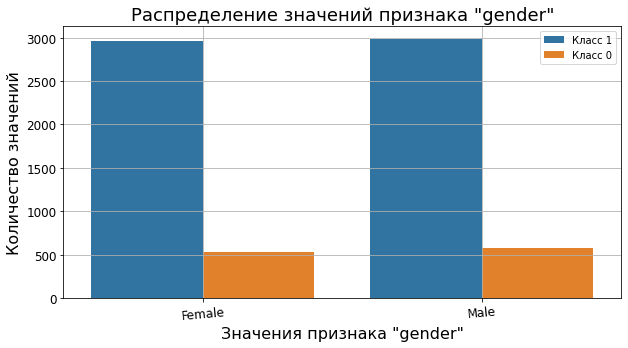


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "senior_citizen" (является ли абонент пенсионером):


,count,unique,top,freq
Класс 0,5942,2,No,5032
Класс 1,1101,2,No,869


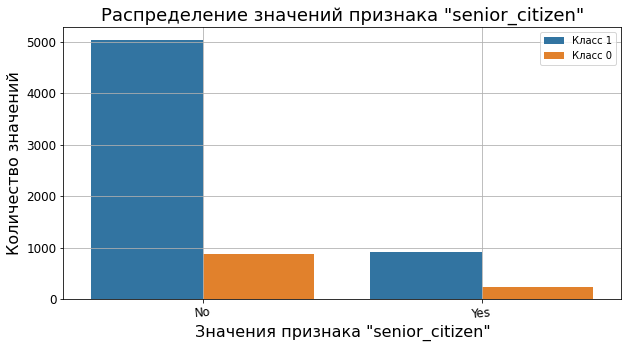


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "partner" (есть ли у абонента супруг или супруга):


,count,unique,top,freq
Класс 0,5942,2,No,3259
Класс 1,1101,2,Yes,719


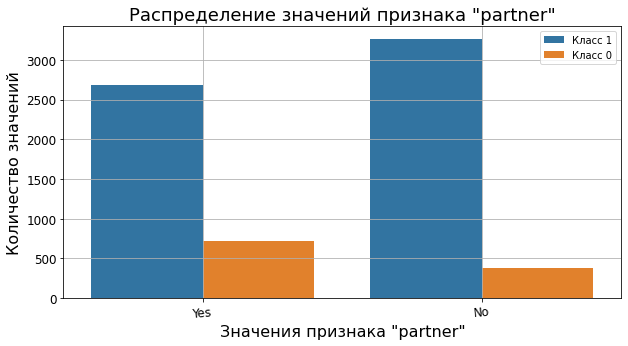


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "dependents" (есть ли у абонента дети):


,count,unique,top,freq
Класс 0,5942,2,No,4200
Класс 1,1101,2,No,733


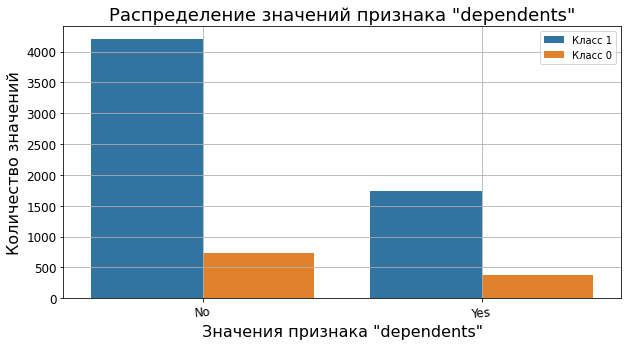


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "type" (тип оплаты):


,count,unique,top,freq
Класс 0,5942,3,Month-to-month,3468
Класс 1,1101,3,Month-to-month,407


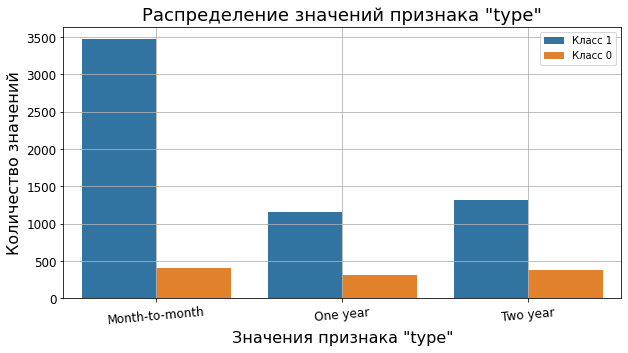


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "paperless_billing" (электронный расчётный лист):


,count,unique,top,freq
Класс 0,5942,2,Yes,3450
Класс 1,1101,2,Yes,721


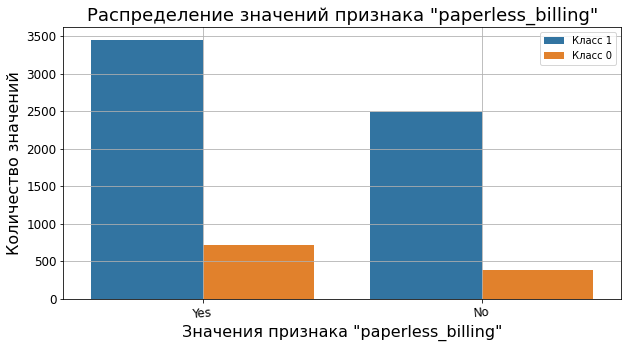


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "payment_method" (тип платежа):


,count,unique,top,freq
Класс 0,5942,4,Electronic check,2015
Класс 1,1101,4,Electronic check,350


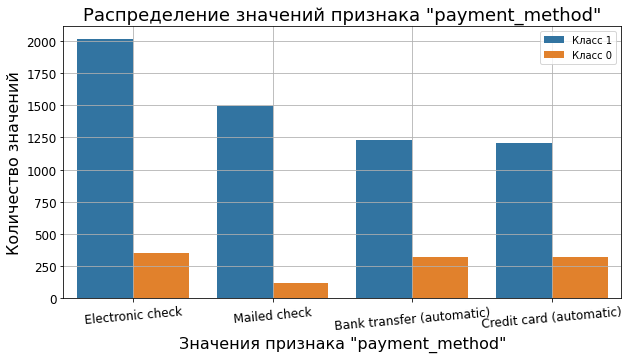


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "internet_service" (тип подключения):


,count,unique,top,freq
Класс 0,5942,3,Fiber optic,2501
Класс 1,1101,3,Fiber optic,595


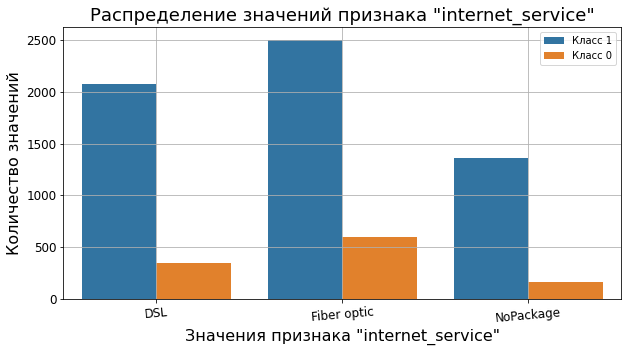


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "online_security" (блокировка опасных сайтов):


,count,unique,top,freq
Класс 0,5942,3,No,2972
Класс 1,1101,3,No,526


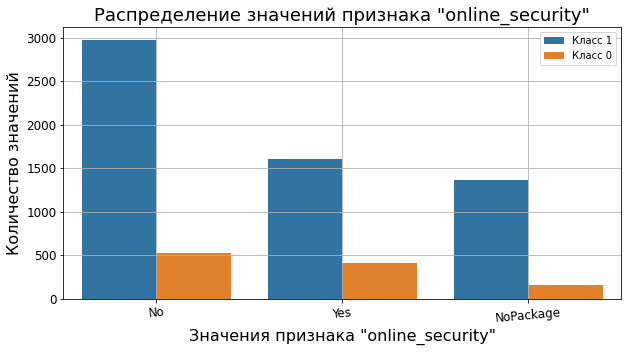


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "online_backup" (облачное хранилище файлов для резервного копирования данных):


,count,unique,top,freq
Класс 0,5942,3,No,2707
Класс 1,1101,3,Yes,560


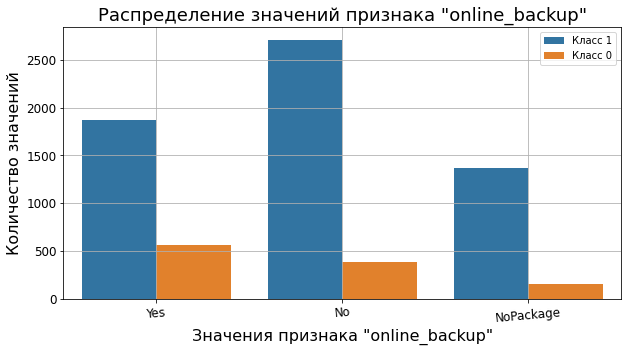


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "device_protection" (антивирус):


,count,unique,top,freq
Класс 0,5942,3,No,2704
Класс 1,1101,3,Yes,550


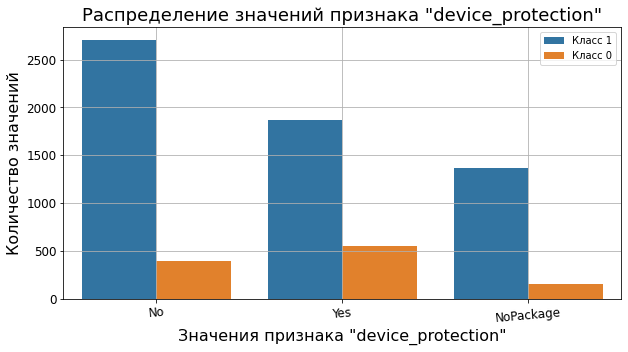


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "tech_support" (выделенная линия технической поддержки):


,count,unique,top,freq
Класс 0,5942,3,No,2930
Класс 1,1101,3,No,543


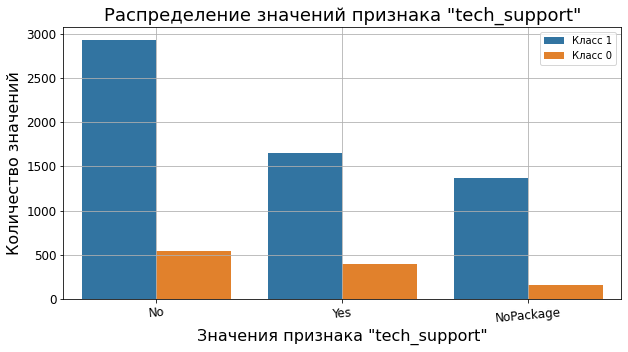


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "streaming_tv" (стриминговое телевидение):


,count,unique,top,freq
Класс 0,5942,3,No,2453
Класс 1,1101,3,Yes,584


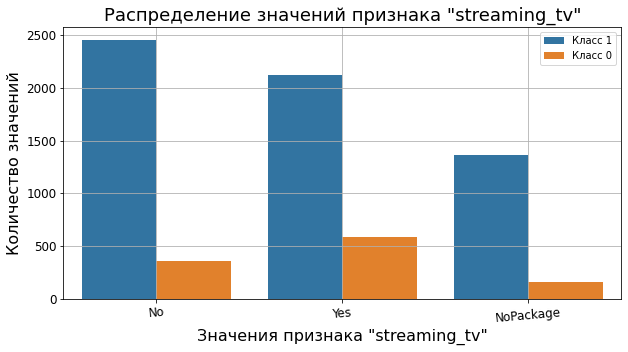


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "streaming_movies" (каталог фильмов):


,count,unique,top,freq
Класс 0,5942,3,No,2450
Класс 1,1101,3,Yes,606


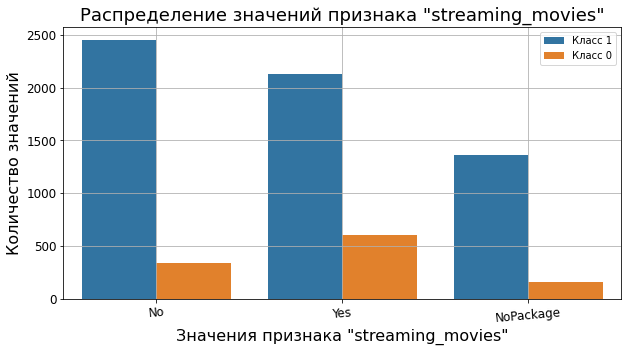


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "multiple_lines" (подключение телефона к нескольким линиям одновременно):


,count,unique,top,freq
Класс 0,5942,3,No,3070
Класс 1,1101,3,Yes,678


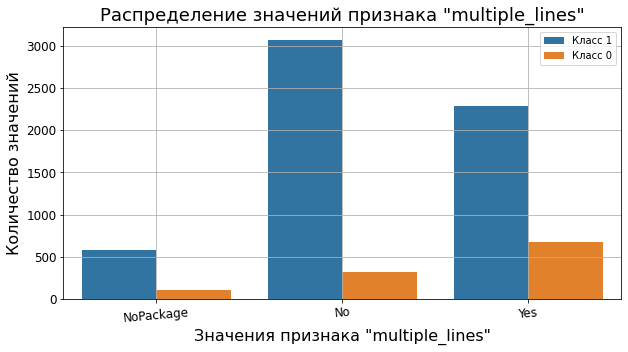


,----------------------------------------------------------------------------------------------------


In [53]:
graph_bar_df(total, total_сol)

In [54]:
# функция построения гистограмм для анализа признаков
def graph_hist_df(df, dict_list): # на вход датафрейм и словарь
    col_num_list = []
    col_key_num_list = []
    
    num_cols = df.select_dtypes(include='number').columns
    
    for col in num_cols: # создаю списки ключей и значений
        if col != 'active_contract':
            col_key_num_list.append(dict_list[col])
            col_num_list.append(col)
              
    for k in col_num_list:
        i = col_key_num_list[col_num_list.index(k)]
        print(f'Распределение значений признака "{k}" ({i}):')
            
        y_0 = df.loc[df['active_contract'] == 0, k] 
        y_1 = df.loc[df['active_contract'] == 1, k] 
                
        y_0 = y_0.rename('Класс 0') 
        y_1 = y_1.rename('Класс 1') 
            
        y = pd.DataFrame([y_0, y_1], columns=['Класс 0', 'Класс 1'])
            
        display(pd.DataFrame([y_0.describe(), y_1.describe()]))
            
        plt.figure(figsize=(10,5))
        
        sns.histplot([y_1, y_0], stat='density', common_norm=False, kde=True)
        plt.title(f'Распределение значений признака "{k}"', fontsize=18)
        plt.grid(True)
        plt.xlabel(f'Значения признака "{k}"', fontsize=16)
        plt.ylabel('Плотность распределения', fontsize=16)
        plt.tick_params(labelsize=13)
        
        plt.show()   
        
        print(f'\n{"-" * 100}')
            

Распределение значений признака "monthly_charges" (расходы за месяц):


,count,mean,std,min,25%,50%,75%,max
Класс 0,5942.0,62.763455,29.844462,18.25,30.0625,69.2,87.2375,118.60
Класс 1,1101.0,75.546004,29.116213,18.40,56.1500,84.2,99.5000,118.75


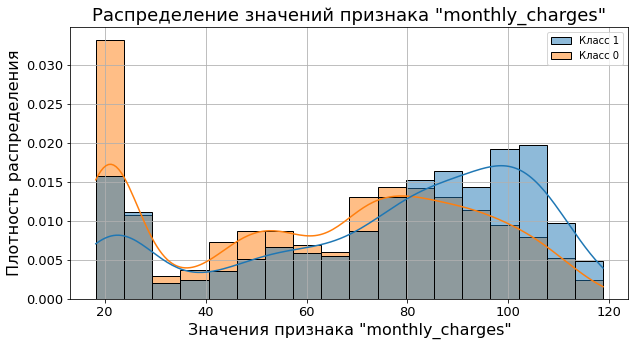


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "total_charges" (общие расходы абонента):


,count,mean,std,min,25%,50%,75%,max
Класс 0,5942.0,2067.866420,2193.898483,0.00,374.3525,1192.80,3173.8375,9221.38
Класс 1,1101.0,2371.377275,1581.862275,77.84,1048.0500,2139.03,3404.9100,7649.76


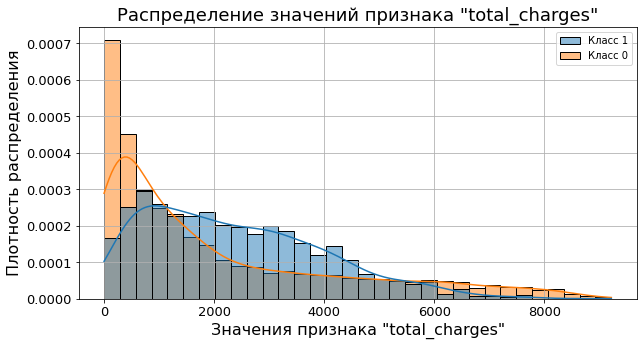


,----------------------------------------------------------------------------------------------------
,Распределение значений признака "duration_contract" (длительность договора в днях):


,count,mean,std,min,25%,50%,75%,max
Класс 0,5942.0,893.681084,716.958551,0.0,245.0,702.0,1523.0,2314.0
Класс 1,1101.0,924.863760,458.771309,28.0,577.0,915.0,1249.0,2129.0


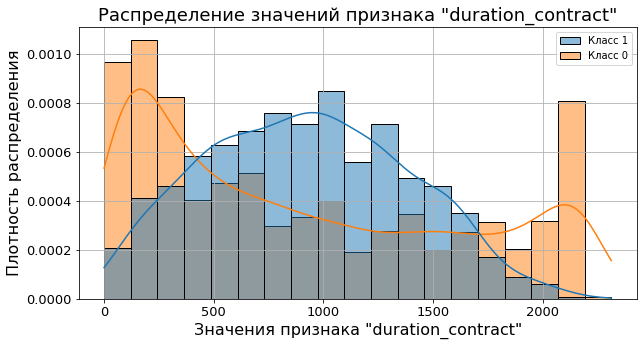


,----------------------------------------------------------------------------------------------------


In [55]:
graph_hist_df(total, total_сol)

In [56]:
# Посмотрим на дисбаланс классов
total['active_contract'].value_counts(normalize=True)

0    0.843675
1    0.156325
Name: active_contract, dtype: float64

#### Вывод

В датафрейме 16 категориальных признаков и 3 числовых.

Категоиальные признаки имеют сильный дисбаланс классов, перевес в сторону значения 0. Числовые признаки без аномальных выбросов.
<hr>

Также по графикам видно, что:

1. Самый популярный способ оплаты - это помесячный. Также больше клиентов, которые оплачивают услуги раз в 2 года, чем раз в год. Могу предположить, что они имеют более выгодные условия.
2. Клиенты предпочитают электронный счет и оплачивают электронным чеком.
3. Подключают чаще оптоволоконный интернет.
4. С ростом стоимости тарифа за месяц (monthly_charges) количество клиентов уменьшается. Пик же в значении ~20 - это минимальное значение.
5. В duration_contract пик в районе новых клиентов, которые только подключили услуги.
6. Пенсионеров значительно меньше, чем вторая возрастная группа.
7. Среди клиентов не сильно больше тех, кто не имеет партнера.
8. Сильный перевес клиентов в сторону тех, у кого есть иждивенцы.
9. От доп. услуг чаще отказываются.
10. С ростом длительности договора вероятность отказа от услуг снижается. Пик примерно на 1000 дней (2,5 года)

<hr>
Признак active_contract является целевым и имеет дисбаланс классов. Соотношение 84/16, больше класса 0 - договор активен.

### 5. 2. Корреляционный анализ

In [57]:
total_num = ['monthly_charges', 'total_charges', 'duration_contract']

In [58]:
# функция для построения матрицы корреляции
def phik_plot(df, interval_col): # датафрейм и список непрерывных числовых признаков
    phik_overview = df.phik_matrix(interval_cols=interval_col) 

    plot_correlation_matrix(
        phik_overview.values,
        x_labels=phik_overview.columns,
        y_labels=phik_overview.index,
        vmin=0, vmax=1, color_map='coolwarm',
        title=r'correlation $\phi_K$',
        fontsize_factor=1.5,
        figsize=(20, 15)
    ) 

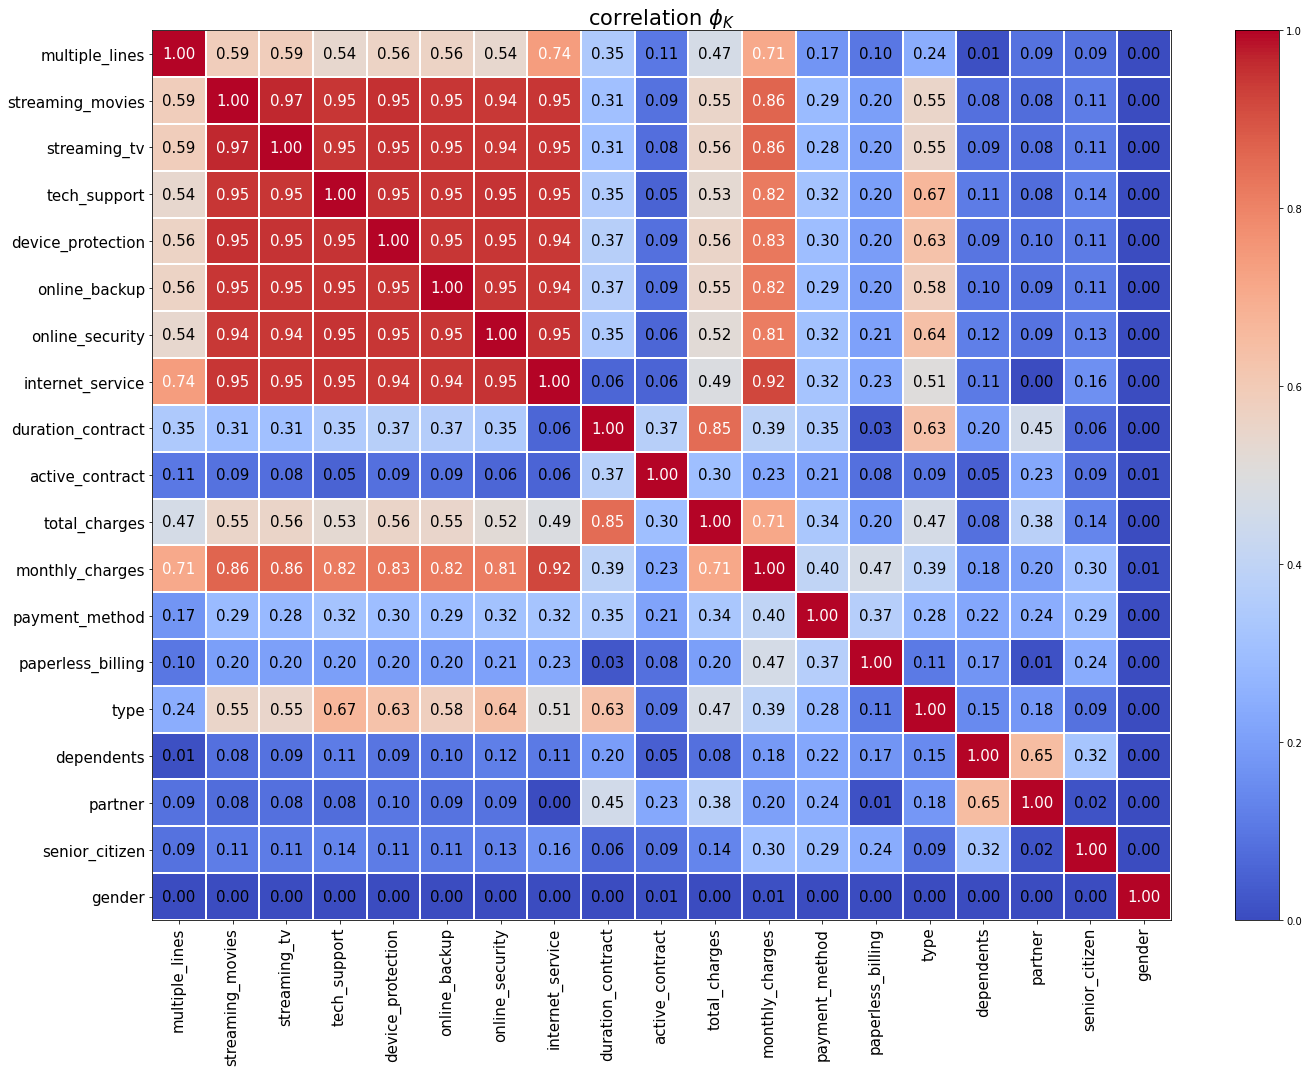

In [59]:
phik_plot(total.drop('customer_id', axis=1), total_num) 

In [60]:
# Функция для отбора признаков без мультиколлениарности
def non_multicol(matrix, target, min_value, max_value): # матрица корреляции, целевой признак,
    columns = []                                        # минимальное значение корреляции и максимальное значение
    index = []
    res = []
    
    for col in matrix.columns:
        if matrix[col][target] > min_value and col != target:
                columns.append(col)
                index.append(col)
                
    append = True
    for col in columns:
        for i in index:
             if  i != col and i not in res and col not in res:
                if matrix[col][i] >= max_value:
                    if matrix[col][target] < matrix[i][target]:
                        append = False
                        break
        if append == True: 
            res.append(col) 
        append = True 
    return res 

In [61]:
list_columns = non_multicol(total.drop('customer_id', axis=1).phik_matrix(interval_cols=total_num),
                            'active_contract',
                            0.03, # выбрала порог по шкале Чеддока - граница между слабой и средней силы связи
                            0.8) # примерно граница между средней и силой силы связи

In [62]:
# список признаков, которые оставим
list_columns

['senior_citizen',
 'partner',
 'dependents',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'duration_contract',
 'online_backup',
 'streaming_movies',
 'multiple_lines']

In [63]:
# Разбиваем полученный список на категориальные и числовые признаки
cat_columns = []
num_columns = []

for col in list_columns:
    if col in total_num:
        num_columns.append(col)
    else:
        cat_columns.append(col)

In [64]:
print('Категориальные признаки:\n', cat_columns)
print('\nЧисловые признаки:\n', num_columns)

Категориальные признаки:
, ['senior_citizen', 'partner', 'dependents', 'type', 'paperless_billing', 'payment_method', 'online_backup', 'streaming_movies', 'multiple_lines']
,
,Числовые признаки:
, ['monthly_charges', 'duration_contract']


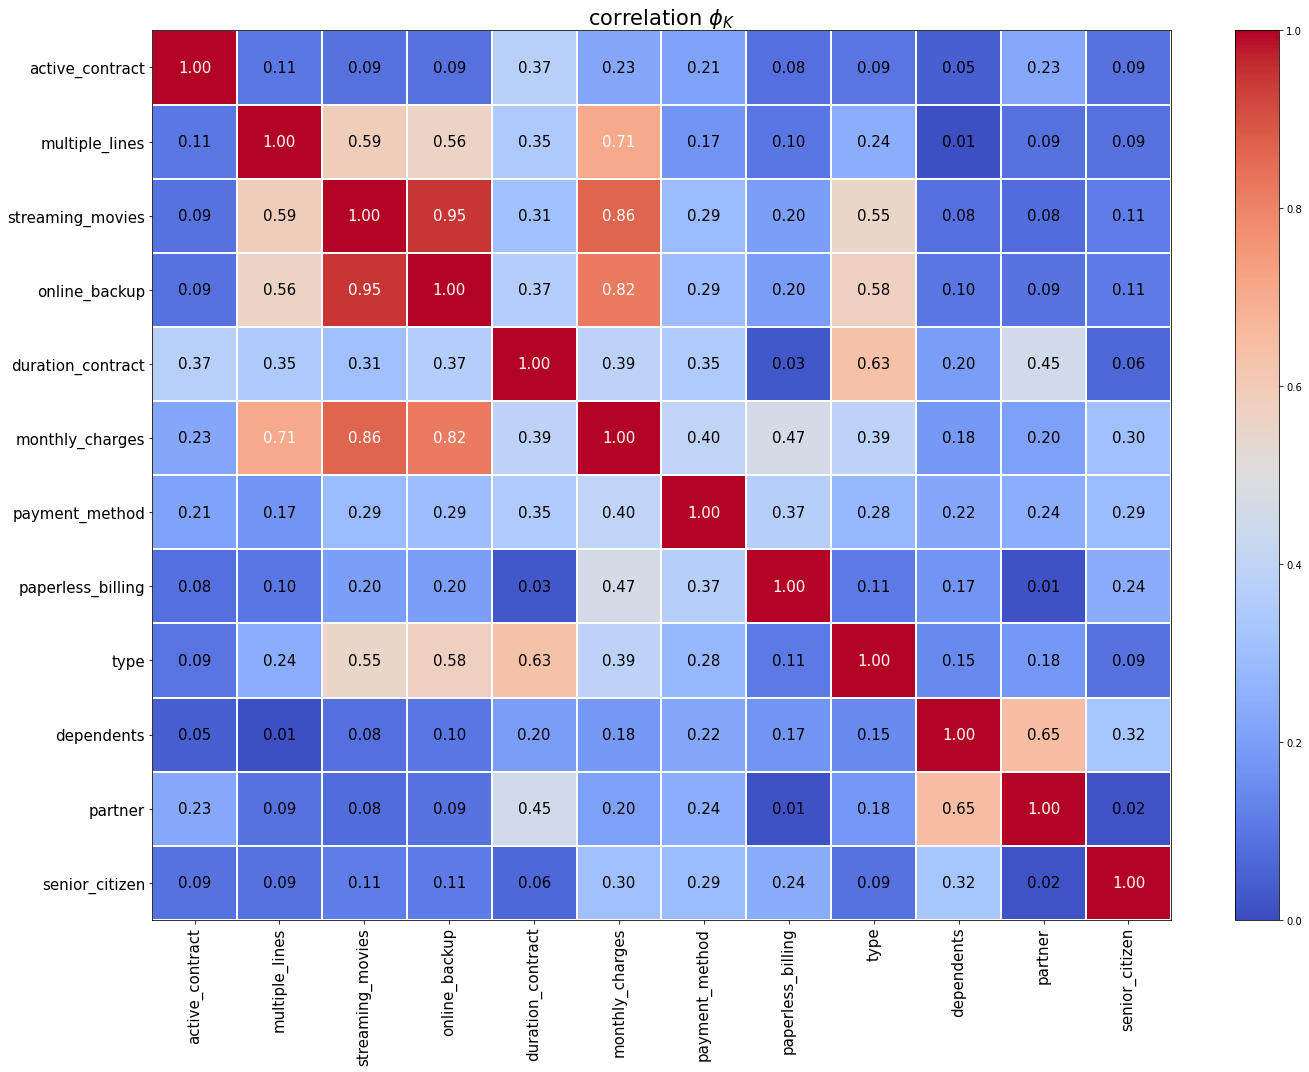

In [65]:
# Матрица корреляции с учетом нового списка
phik_plot(total[list_columns + ['active_contract']], num_columns)

In [66]:
# удалим оставшиеся признаки с высокой мультиколлинеарностью
cat_columns.remove('online_backup')
cat_columns.remove('streaming_movies')

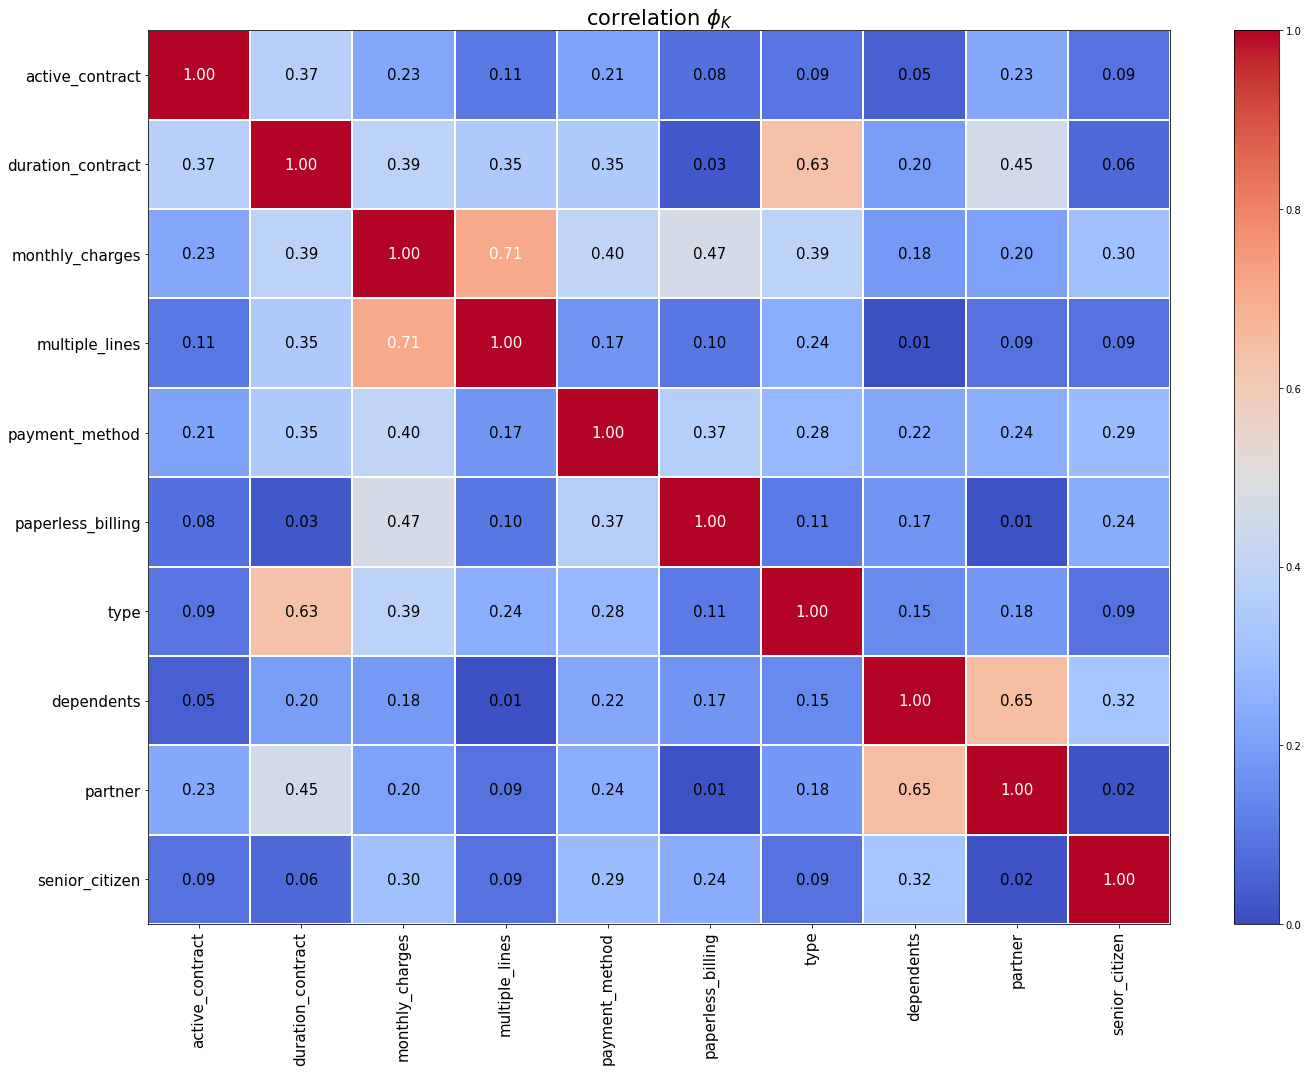

In [67]:
# Матрица корреляции с учетом нового списка для линейной модели
phik_plot(total[cat_columns + num_columns + ['active_contract']], num_columns)

In [68]:
list_columns = cat_columns + num_columns

In [69]:
list_columns

['senior_citizen',
 'partner',
 'dependents',
 'type',
 'paperless_billing',
 'payment_method',
 'multiple_lines',
 'monthly_charges',
 'duration_contract']

#### Вывод

Провели корреляционный анализ и среди мультиколлинеарных признаков отобрали те, что имеют большую корреляцию с целевым признаком.

## 6. Подготовка данных

In [70]:
# Разделим датафрейм на две выборки
features = total[list_columns]
target = total['active_contract']

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=.25, 
                                                    stratify=target, 
                                                    random_state=RANDOM_STATE)

In [71]:
X_train.head()

,senior_citizen,partner,dependents,type,paperless_billing,payment_method,multiple_lines,monthly_charges,duration_contract
575,No,Yes,No,Two year,Yes,Mailed check,No,81.05,1461
2624,No,Yes,Yes,Month-to-month,Yes,Mailed check,Yes,66.70,518
430,No,Yes,Yes,Month-to-month,Yes,Mailed check,No,19.40,457
6141,Yes,Yes,No,Month-to-month,Yes,Electronic check,Yes,104.20,792
5281,No,Yes,Yes,Two year,No,Credit card (automatic),Yes,66.75,2191


In [72]:
y_train.head()

575     1
2624    0
430     1
6141    1
5281    0
Name: active_contract, dtype: int64

In [73]:
X_test.head()

,senior_citizen,partner,dependents,type,paperless_billing,payment_method,multiple_lines,monthly_charges,duration_contract
2684,No,No,No,One year,Yes,Bank transfer (automatic),Yes,105.20,2102
5794,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),Yes,109.75,2191
5276,No,Yes,Yes,One year,No,Mailed check,No,56.90,1156
659,No,Yes,No,Month-to-month,No,Bank transfer (automatic),No,20.35,1126
3276,No,No,No,Month-to-month,Yes,Electronic check,No,79.15,215


In [74]:
y_test.head()

2684    0
5794    0
5276    1
659     0
3276    0
Name: active_contract, dtype: int64

In [75]:
print('Размер тренировочной выборки:', X_train.shape, y_train.shape)
print('Размер тестовой выборки:', X_test.shape, y_test.shape)

Размер тренировочной выборки: (5282, 9) (5282,)
,Размер тестовой выборки: (1761, 9) (1761,)


In [76]:
print(f'Соотношение train/test = {round(X_train.shape[0] / X_test.shape[0])}:1 ')

Соотношение train/test = 3:1 


In [77]:
print(f'Соотношение 1 и 0 в тренировочной выборке:\n{y_train.value_counts(normalize=True)}')
print(f'\nСоотношение 1 и 0 в тестовой выборке:\n{y_test.value_counts(normalize=True)}')

Соотношение 1 и 0 в тренировочной выборке:
,0    0.84362
,1    0.15638
,Name: active_contract, dtype: float64
,
,Соотношение 1 и 0 в тестовой выборке:
,0    0.843839
,1    0.156161
,Name: active_contract, dtype: float64


## 7. Обучение моделей машинного обучения

In [78]:
# функция для подбора параметров и обучения модели
def fit_train(model, params, column_trans=None): # модель, 
    if column_trans==None:                       # параметры модели, трансформер(необязательный)
        pipeline = Pipeline([('model', model)])        
    else:
        pipeline = Pipeline([('transform', column_trans),
                             ('model', model)])  
    
    start_time = time.time() 
    
    grid = GridSearchCV(pipeline,
                        cv=4,
                        n_jobs=-1,
                        param_grid=params,
                        scoring='roc_auc',
                        error_score='raise'
                       )

    grid.fit(X_train, y_train)
    
    finish_time = time.time()
    res_time = finish_time - start_time
    
    print('Лучший результат:', grid.best_score_)
    print('Лучшие параметры:', grid.best_params_)
    print('Время выполнения:', res_time)
    return grid, res_time # модель с лучшими гиперпараметрами, время выполнения подбора и обучения

### 7. 1. LogisticRegression

In [79]:
# модель LogisticRegression
model_lr = LogisticRegression(
    random_state=RANDOM_STATE) 
    #class_weight='balanced')

In [80]:
# Преобразование признаков для линейной модели
column_trans_lr = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_columns),
    ('num', StandardScaler(), num_columns)], remainder="drop")  

In [81]:
# Вызываем функцию
lr_model, time_lr = fit_train(model_lr, 
                              {'model__C' :  range(50, 150, 10), 'model__solver' : ['liblinear', 'lbfgs', 'newton-cg']},
                              column_trans_lr)

Лучший результат: 0.7548019724486702
,Лучшие параметры: {'model__C': 80, 'model__solver': 'lbfgs'}
,Время выполнения: 49.96908450126648


### 7. 2. DecisionTreeClassifier

In [82]:
# модель DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)
                                   #class_weight='balanced')

In [83]:
# Пайплайн с обработкой значений и пропущенных
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', 
      SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     
     ('ord', 
      OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
     
     ('simpleImputer_after_ord', 
      SimpleImputer(missing_values=np.nan, strategy='most_frequent'))]) 

In [84]:
# Преобразование признаков для дерева
column_trans_dtc = ColumnTransformer([
    ('ord', ord_pipe, cat_columns),
    ('num', StandardScaler(), num_columns)], remainder="drop")

In [85]:
dtc_model, time_dtc = fit_train(model_dtc, {'model__max_depth': range(1, 10),
                                            'model__max_features': range(2, 12)}, column_trans_dtc)

Лучший результат: 0.7978362999552788
,Лучшие параметры: {'model__max_depth': 6, 'model__max_features': 7}
,Время выполнения: 11.353676319122314


### 7. 3. CatBoostClassifier

In [86]:
# массив с индексами категориальных признаков
cat_features = np.array([X_train.columns.get_loc(c) for c in cat_columns])

In [87]:
# модель CatBoostClassifier
model_cat = CatBoostClassifier(logging_level='Silent', 
                               random_state=RANDOM_STATE,
                               cat_features=cat_features) 

In [88]:
cat_model, time_cat = fit_train(model_cat, {'model__depth' : [1, 5, 10], 
                                            'model__iterations' : [10, 50, 100, 200],
                                            'model__learning_rate' : [.001, .5, .999]})

Лучший результат: 0.9106072865046446
,Лучшие параметры: {'model__depth': 5, 'model__iterations': 200, 'model__learning_rate': 0.5}
,Время выполнения: 153.44658780097961


## 8. Выбор лучшей модели

In [89]:
index_model = ['LogisticRegression',
               'DecisionTreeClassifier',
               'CatBoostClassifier']

data_model = {'ROC-AUC на тренировочной выборке' : [lr_model.best_score_,
                                                   dtc_model.best_score_,
                                                   cat_model.best_score_],
              'Время выполнения' : [time_lr,
                                    time_dtc,
                                    time_cat]}

roc_data = pd.DataFrame(data=data_model, index=index_model)

roc_data.sort_values(by='ROC-AUC на тренировочной выборке', ascending=False)

,ROC-AUC на тренировочной выборке,Время выполнения
CatBoostClassifier,0.910607,153.446588
DecisionTreeClassifier,0.797836,11.353676
LogisticRegression,0.754802,49.969085


<pre>
Основываясь на метрику ROC-AUC, лучший результат у модели <b>CatBoostClassifier</b>.
<b>Гиперпараметры</b>: {'logging_level': 'Silent', 
                 'random_state': 160924, 
                 'model__depth': 5, 
                 'model__iterations': 200,
                 'model__learning_rate': 0.5} 
                 
Метрика <b>ROC-AUC = 0.91</b>, время подбора параметров и обучения <b>~153 секунд</b>.
</pre>

### 8. 1. Тестирование лучшей модели

In [90]:
# Предсказание лучшей модели
predict = cat_model.predict(X_test)
predict_proba = cat_model.predict_proba(X_test)

In [91]:
# Расчет "ROC AUC" 
roc_auc = roc_auc_score(y_test, predict_proba[:, 1])
print('Показатель ROC-AUC:', roc_auc)

Показатель ROC-AUC: 0.9271577144255475


В результате тестирования лучшей модели получена метрика ROC-AUC выше требуемого значения 0.85.

Показатель ROC-AUC на тестовой выборке 0.93.

### 8. 2. Проверка модели на адекватность

In [92]:
# Проверка модели на адекватность будет производится с помощью DummyClassifier со стратегией constant
dummy_clf = DummyClassifier(strategy="constant", random_state=RANDOM_STATE, constant=1) # выбрала метку минорного класса

In [93]:
dummy_clf.fit(X_train, y_train)

dummy_clf.score(X_test, y_test)

0.15616127200454288

Оценка качества 0.16 модели DummyClassifier ниже оценки качества 0.93, полученной с помощью модели CatBoostClassifier с оптимальным параметрами на тестовых данных.

### 8. 3. Анализ протестированной модели

In [94]:
# Функция для построения ROC кривой
def plot_roc_curve(target_test, predictions):   # реальные значения, предсказанные
    fpr, tpr, treshold = roc_curve(target_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    
    plt.plot(fpr, tpr, label='ROC кривая (площадь под кривой = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    
    plt.legend(loc="lower right", fontsize=15)
    plt.title('ROC-кривая', fontsize=16)
    plt.grid(True)
    plt.tick_params(labelsize=13)
    plt.show()
    
    print('ROC-AUC score', roc_auc_score(target_test, predictions))

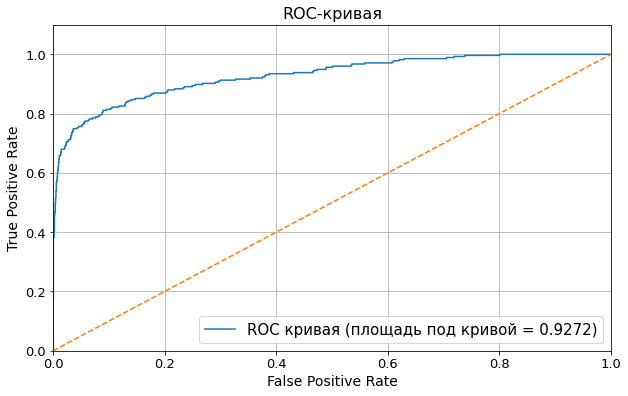

ROC-AUC score 0.9271577144255475


In [95]:
plot_roc_curve(y_test, predict_proba[:, 1])

ROC кривая выпуклая вверх. Под ней большая часть площади всего прямоугольника, в который она вписана. 

Следовательно, модель в большинстве случаев правильно предсказывает целевые значения.

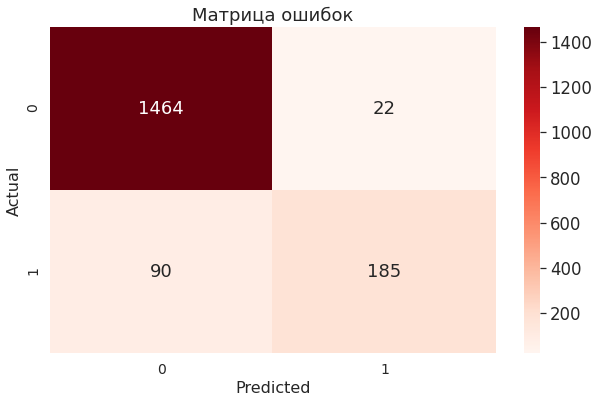

In [96]:
cm = confusion_matrix(y_test, predict)

sns.set (font_scale=1.5)
plt.figure(figsize=(10, 6))

sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Матрица ошибок', fontsize=18)
plt.tick_params(labelsize=14)
plt.show()

<pre>
<b>185</b> - количество неактивных договоров, прогноз совпал с реальностью.
Процент от общего количества неактивных договоров: 67.3%.

<b>90</b> - неверно классифицированные случаи. Неактивный договор, но модель это не определила.
Процент от общего количества неактивных договоров: 32.7%.

<b>1464</b> - количество активных договоров, прогноз совпал с реальностью.
Процент от общего количества активных договоров: 98.5%

<b>22</b> - неверно классифицированные случаи. Активный договор, но модель это не определила.
Процент от общего количества активных договоров: 1.5%
</pre>

Матрица ошибок показывает, что модель в 98.5% случаях правильно предсказывет класс 0 (договор активен). Однако класс 1 (договор неактивен) модель правильно предсказывает в 67.3%. 

In [97]:
print(f'recall {recall_score(y_test, predict)}')

recall 0.6727272727272727


In [98]:
print(f'precision {precision_score(y_test, predict)}')

precision 0.893719806763285


**Precision** показывает точность, с которой модель присваивает объектам класс 1, то есть определяет, не слишком ли часто модель выставляет класс 1 объектам класса 0. Это значение - **0.89**

**Recall** измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Это значение - **0.67**

Данная модель эффективно предсказывает, что клиент не собирается расторгать договор, и в 2 из 3 случаях предскажет, что клиент расторгнет договор.

In [99]:
# Метрика "Accuracy" 
print('Показатель Accuracy:', accuracy_score(y_test, predict)) 

Показатель Accuracy: 0.9363997728563316


Показатель метрики **"Accuracy" ~0.936**. Это означает, что в примерно в 93.6% случаев модель правильно предсказывает класс. 

In [100]:
importances_df = pd.DataFrame(cat_model.best_estimator_[-1].feature_importances_,
                              index = X_test.columns,
                              columns=['Важность признака'])

importances_df = importances_df.sort_values(by='Важность признака', ascending=False)
display(importances_df)

,Важность признака
duration_contract,59.134004
monthly_charges,15.437772
type,8.332697
payment_method,4.931055
multiple_lines,4.708874
partner,3.009210
dependents,1.708016
paperless_billing,1.620266
senior_citizen,1.118106


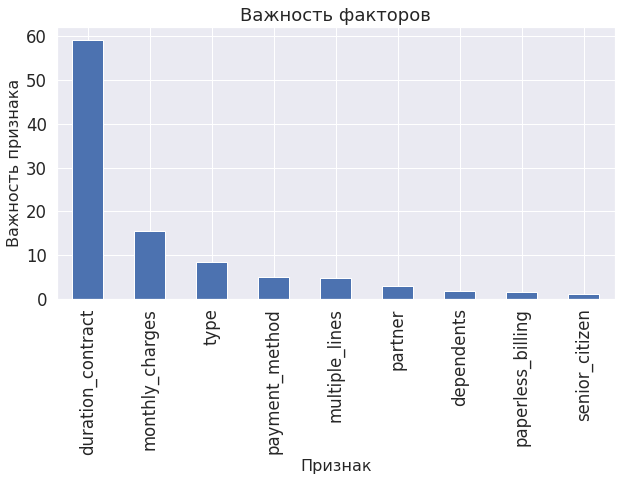

In [101]:
importances_df.plot(kind='bar', figsize=(10, 5), title='Важность факторов', legend=False)
plt.ylabel('Важность признака', fontsize=16)
plt.xlabel('Признак', fontsize=16)
plt.show()

Анализ признаков выявил, что с наибольшим отрывом лидирует duration_contract, этот признак влияет болььше всего на предсказания. Следом идет monthly_charges, затем на третьем месте type. В самом низу списка senior_citizen, изменение этого признака меньше всего скажется на предсказаниях модели.

## 9. Общий вывод и рекомендации заказчику

**Цель проекта** построить и обучить модель для предсказания оттока клиентов компании "ТелеДом". Были рассмотрены три модели МО: LogisticRegression, DecisionTreeClassifier и CatBoostClassifier. Лучшая метрика ROC AUC на тренировочных данных была у CatBoostClassifier с гиперпараметрами:
<pre>
{'logging_level': 'Silent', 
 'random_state': 160924, 
 'model__depth': 5, 
 'model__iterations': 200,
 'model__learning_rate': 0.5} 
 
 Метрика ROC AUC = 0.91, что подходит требованиям (метрика >= 0.85).
</pre>

**В ходе работы было сделано:**

1. Загрузили данные из файлов.


2. Провели предобработу данных и анализ датафреймов **contract**(информация о договоре), **personal**(персональные данные клиента), **internet**(информация об интернет-услугах) и **phone**(информация об услугах телефонии):

    - Привели наименования к "змеиному регистру";
    - Изменили типы данных;
    - Добавили два новых признака: duration_contract(длительность контракта в днях) и active_contract(актисность контракта);
    - Удалили столбцы "begin_date"(дата начала действия договора) и "end_date"( дата окончания действия договора);


3. Исходные df были объединены в общий датафрейм. Провели исследовательский и корреляционный анализ, на основе которого отобрали признаки для дальнейшего обучения. Также выяснили, что со временем вероятность отказа от услуг снижается, также отказывались от услуг те, кто платил больше.


4. Выделили тренировочную и тестовую выборки. 


5. Подготовлены данные к использованию в обучении моделей.


6. Обучили три модели МО: LogisticRegression, DecisionTreeClassifier и CatBoostClassifier.


7. На основе метрики ROC AUC на тренировочной выборке выбрали лучшую модель и протестировали.


**Самые важные признаки:** длительность использования услуг и их стоимость в месяц.
<hr>

**Рекомендации для бизнеса:**

Данная модель может выявить с вероятностью в 93.6%, уйдет клиент или нет.

При возникновении потребности увеличить этот показатель, предлагаю рассмотреть использование модели нейронных сетей. Например, Keras (TensorFlow), она может показать еще более высокий результат на тех же данных.

Также для увеличения точности модели, можно собрать больше данных о клиентах и/или добавить новые признаки.

<b>На основе графиков мы выяснили, что:</b>
- чаще уходят те, у кото  высокие ежемесячные расходы,
- также уходят те, у кого длительность договора приближается к 2,5 годам.


<b>Можно выдвинуть следующие гипотезы: </b>
- клиенты уходят к конкурентам, у которых ниже цены,
- не получают те услуги, за которые платят. 


<b>Для проверки гипотезы, предлагаю:</b>
1. Провести опрос среди тех, кого модель определила, как "уходящих".
2. Провести анализ цен конкурентов.

На основе полученных ответов можно понять, почему пользователь собирается уйти, какие действия нужны, чтобы его удержать, а также запланировать бюджет на работу с клиентами.